In [1]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

In [2]:
gis = GIS("https://maptastikdev.maps.arcgis.com", client_id='234AQEsynXPu4AOF') # Use your own client ID
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://maptastikdev.maps.arcgis.com/sharing/rest/oauth2/authorize?client_id=234AQEsynXPu4AOF&response_type=code&expiration=-1&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob
Enter code obtained on signing in using SAML: ········
Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://maptastikdev.maps.arcgis.com/sharing/rest/oauth2/authorize?client_id=234AQEsynXPu4AOF&response_type=code&expiration=-1&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob
Enter code obtained on signing in using SAML: ········
Successfully logged in as: maptastik_dev


In [84]:
map1 = gis.map("Raleigh, NC")
map1

<Item title:"Census Block Groups 2000" type:Feature Layer Collection owner:WakeCountyGovernment>
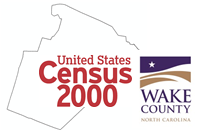

<Item title:"Census Block Groups 2010" type:Feature Layer Collection owner:WakeCountyGovernment>
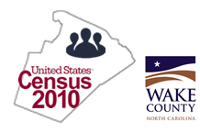

In [85]:
search = gis.content.search("census wake county census block groups", "Feature Layer", outside_org=True)
for item in search:
    display(item)

In [86]:
bg_lyr = search[1]
map1.add_layer(bg_lyr)

In [87]:
bg_df = bg_lyr.layers[0].query().df
bg_df.head()

,ALAND10,AWATER10,BLKGRPCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,MTFCC10,NAMELSAD10,OBJECTID,OCCUPIED,STATEFP10,TOTAL_HU,TOTAL_POP,TRACTCE10,VACANT,SHAPE
0,28015589,3685523,4,183,S,371830539004,+35.9826476,-078.5819610,G5030,Block Group 4,1,999,37,1103,3056,053900,104,"{'rings': [[[2130601.7723483, 808432.595596805..."
1,1175140,0,1,183,S,371830517001,+35.8182151,-078.6410672,G5030,Block Group 1,2,393,37,417,1089,051700,24,"{'rings': [[[2104538.38254605, 755109.16615463..."
2,819052,0,3,183,S,371830534163,+35.7323033,-078.8550084,G5030,Block Group 3,3,265,37,297,649,053416,32,"{'rings': [[[2042587.60224839, 722637.45321105..."
3,5306858,0,4,183,S,371830530094,+35.6864197,-078.6888316,G5030,Block Group 4,4,412,37,454,1171,053009,42,"{'rings': [[[2095679.76640506, 706136.89894188..."
4,646800,0,1,183,S,371830540161,+35.8969045,-078.5760345,G5030,Block Group 1,5,486,37,504,1240,054016,18,"{'rings': [[[2127597.07330522, 781709.29471281..."


## Grab some SeeClickFix Data
Thanks to Paul Crickard from ABQ! ([Code](https://github.com/PaulCrickard/Python/blob/master/SCFIssues.py))

In [88]:
import requests
import json
import pandas as pd
import os

In [17]:
bg_extent = bg_lyr.extent
min_lat = str(bg_extent[0][1])
min_lng = str(bg_extent[0][0])
max_lat = str(bg_extent[1][1])
max_lng = str(bg_extent[1][0])

In [18]:
url = "https://seeclickfix.com/api/v2/issues?min_lat={}2&min_lng={}&max_lat={}&max_lng={}&per_page=100".format(min_lat, min_lng, max_lat, max_lng)
url

'https://seeclickfix.com/api/v2/issues?min_lat=35.519597843760962&min_lng=-78.99536120801017&max_lat=36.0745258441381&max_lng=-78.25226177503176&per_page=100'

In [41]:
r=requests.get(url).text
rAsJSON=json.loads(r)
pages = rAsJSON['metadata']['pagination']['pages']
pagesURL="https://seeclickfix.com/api/v2/issues?min_lat={}&min_lng={}&max_lat={}&max_lng={}&per_page=100&page=".format(min_lat, min_lng, max_lat, max_lng)
issues=[]
errors = []

for x in range(1,pages+1):
    pageData=requests.get(pagesURL+str(x)).text
    pageDataAsJSON=json.loads(pageData)
    
    
    for y in pageDataAsJSON['issues']:
        try:
            issues.append([y["id"],
                           y["created_at"],
                           y["acknowledged_at"],
                           y["closed_at"],
                           y["address"],
                           y["lat"],
                           y["lng"],
                           y["description"],
                           y["status"],y["summary"],
                           y["media"]["image_full"],
                           y["request_type"]["id"],
                           y["request_type"]["title"]])
        except KeyError as ke:
            errors.append([ke,y["id"]])

issues_df = pd.DataFrame(issues)
errors_df = pd.DataFrame(errors)

In [47]:
issues_df_copy = issues_df.copy()
cols = ['id',
    'created_at',
    'acknowledged_at',
    'closed_at',
    'address',
    'lat',
    'lng',
    'description',
    'status',
    'summary',
    'media_image_full',
    'request_type_id',
    'request_type_title']
issues_df.columns = cols
issues_df.head()

,id,created_at,acknowledged_at,closed_at,address,lat,lng,description,status,summary,media_image_full,request_type_id,request_type_title
0,4281975,2018-03-28T18:08:54-04:00,2018-03-28T18:09:18-04:00,None,"510 1/2 Tilden St Raleigh, NC 27605, USA",35.790829,-78.645325,506 tilden,Acknowledged,Sidewalk Repair,https://seeclickfix.com/files/issue_images/009...,21091,Sidewalk Repair
1,4281781,2018-03-28T16:36:30-04:00,None,None,"Buck Jones At Farmgate Traffic Circle Raleigh,...",35.774291,-78.734969,PLEASE ADD LIGHTING,Open,Other,None,15012,Other
2,4281745,2018-03-28T16:19:32-04:00,None,None,"1511 Glenwood Ave Raleigh, NC 27608, USA",35.799488,-78.646233,"clogged storm drain, large water back\nup in r...",Open,storm drain,None,15012,Other
3,4281303,2018-03-28T14:27:22-04:00,2018-03-28T14:27:29-04:00,None,"100 E Six Forks Road Raleigh, North Carolina",35.822199,-78.631983,Fallen tree covering sidewalk.,Acknowledged,Fallen tree covering sidewalk,None,7341,Trees
4,4281296,2018-03-28T14:24:11-04:00,2018-03-28T14:24:32-04:00,None,"2535 Atlantic Avenue Raleigh, North Carolina",35.816995,-78.617170,Vegetation hanging over the sidewalk and under...,Acknowledged,Traffic Visual Obstruction,https://seeclickfix.com/files/issue_images/009...,7342,Traffic Visual Obstruction


In [53]:
issues_df.to_csv('ral_scf.csv')

In [54]:
issues_csv_df = pd.read_csv('ral_scf.csv')
issues_csv_df.head()

,Unnamed: 0,id,created_at,acknowledged_at,closed_at,address,lat,lng,description,status,summary,media_image_full,request_type_id,request_type_title
0,0,4281975,2018-03-28T18:08:54-04:00,2018-03-28T18:09:18-04:00,NaN,"510 1/2 Tilden St Raleigh, NC 27605, USA",35.790829,-78.645325,506 tilden,Acknowledged,Sidewalk Repair,https://seeclickfix.com/files/issue_images/009...,21091,Sidewalk Repair
1,1,4281781,2018-03-28T16:36:30-04:00,NaN,NaN,"Buck Jones At Farmgate Traffic Circle Raleigh,...",35.774291,-78.734969,PLEASE ADD LIGHTING,Open,Other,NaN,15012,Other
2,2,4281745,2018-03-28T16:19:32-04:00,NaN,NaN,"1511 Glenwood Ave Raleigh, NC 27608, USA",35.799488,-78.646233,"clogged storm drain, large water back\r\nup in...",Open,storm drain,NaN,15012,Other
3,3,4281303,2018-03-28T14:27:22-04:00,2018-03-28T14:27:29-04:00,NaN,"100 E Six Forks Road Raleigh, North Carolina",35.822199,-78.631983,Fallen tree covering sidewalk.,Acknowledged,Fallen tree covering sidewalk,NaN,7341,Trees
4,4,4281296,2018-03-28T14:24:11-04:00,2018-03-28T14:24:32-04:00,NaN,"2535 Atlantic Avenue Raleigh, North Carolina",35.816995,-78.617170,Vegetation hanging over the sidewalk and under...,Acknowledged,Traffic Visual Obstruction,https://seeclickfix.com/files/issue_images/009...,7342,Traffic Visual Obstruction


In [57]:
issues_scf_properties = {'title': 'SeeClickFix Issues',
                   'tags': 'demo',
                   'type': 'CSV'}
issues_csv = gis.content.add(issues_scf_properties,
                               data='ral_scf.csv')

In [58]:
issues_csv

<Item title:"SeeClickFix Issues" type:CSV owner:maptastik_dev>

In [63]:
issues_lyr = issues_csv.publish({'locationType':'coordinates',
                                 'latitudeFieldName':'lat',
                                 'longitudeFieldName':'lng'})

<Item title:"SeeClickFix Issues" type:Feature Layer Collection owner:maptastik_dev>
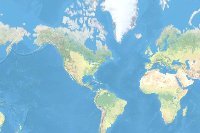

In [64]:
scf_search = gis.content.search("seeclickfix", "Feature Layer")
for item in scf_search:
    display(item)

In [89]:
map2 = gis.map("Raleigh, NC")
map2.basemap = 'dark-gray'
map2

In [90]:
map2.add_layer(bg_lyr)

In [67]:
scf_issues_lyr = scf_search[0]
map2.add_layer(scf_issues_lyr)

In [68]:
from arcgis.features import analysis

In [91]:
agg = analysis.aggregate_points(scf_issues_lyr, bg_lyr, output_name='scf_bg')

In [92]:
agg_search = gis.content.search('scf_bg', 'Feature Layer')
for item in agg_search:
    display(item)

<Item title:"scf_bg" type:Feature Layer Collection owner:maptastik_dev>

In [100]:
map3 = gis.map('Wake County, NC')
map3.basemap = 'gray'
map3

In [94]:
agg_item = agg_search[0]
agg_lyr = agg_item.layers[0]
for field in agg_lyr.properties['fields']:
    print(field['name'])

OBJECTID
Point_Count
STATEFP10
COUNTYFP10
TRACTCE10
BLKGRPCE10
GEOID10
NAMELSAD10
MTFCC10
FUNCSTAT10
ALAND10
AWATER10
INTPTLAT10
INTPTLON10
TOTAL_POP
TOTAL_HU
OCCUPIED
VACANT
AnalysisArea


In [101]:
map3.add_layer(agg_lyr, {"renderer":"ClassedColorRenderer", "field_name": "Point_Count"})